## Task 1: Exploratory Data Analysis and Data Preprocessing
### CFPB Consumer Complaint Dataset

**Objective**  
The goal of this notebook is to explore, analyze, and preprocess the CFPB consumer complaint dataset in preparation for a Retrieval-Augmented Generation (RAG) pipeline.  
The notebook performs initial exploratory data analysis (EDA), filters the dataset based on project requirements, cleans complaint narratives using NLP techniques, and saves a cleaned dataset for downstream use.


In [1]:
import sys
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path.cwd().resolve().parent 
sys.path.append(str(PROJECT_ROOT))

from src.EDA import EDAProcessor


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amare\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:

PARQUET_PATH = PROJECT_ROOT / "data" / "raw"/ "complaints.parquet"
OUTPUT_CSV_PATH = PROJECT_ROOT / "data" /"processed"/ "filtered_complaints.csv"
FIGURES_DIR = PROJECT_ROOT / "reports" / "figures"

BATCH_SIZE = 500_000

In [3]:
processor = EDAProcessor(
    parquet_path=str(PARQUET_PATH),
    output_csv_path=str(OUTPUT_CSV_PATH),
    figures_dir=str(FIGURES_DIR),
    batch_size=BATCH_SIZE
)


2026-01-04 17:01:01,862 - INFO - EDAProcessor initialized


In [4]:
# -----------------------------
# Step 1: Load and inspect first batch
# -----------------------------
print("Loading first batch for inspection...")
batches = processor.load_batches()
first_batch = next(batches)
print(f"First batch shape: {first_batch.shape}")
display(first_batch.head())

Loading first batch for inspection...
First batch shape: (500000, 18)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,None,None,Experian Information Solutions Inc.,FL,32092,None,None,Web,2025-06-20,In progress,Yes,None,14195687
1,2025-06-20,Debt collection,Telecommunications debt,Attempts to collect debt not owed,Debt is not yours,None,Company can't verify or dispute the facts in t...,"Eastern Account Systems of Connecticut, Inc.",FL,342XX,None,None,Web,2025-06-20,Closed with explanation,Yes,None,14195688
2,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AZ,85225,None,None,Web,2025-06-20,In progress,Yes,None,14195689
3,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,None,None,Experian Information Solutions Inc.,AZ,85225,None,None,Web,2025-06-20,In progress,Yes,None,14195690
4,2025-06-20,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account status incorrect,None,None,Experian Information Solutions Inc.,IL,60628,None,None,Web,2025-06-20,In progress,Yes,None,14195692


In [5]:
# -----------------------------
# Step 2: EDA counters on first batch
# -----------------------------
print("Running EDA counters on first batch...")
processor.eda_step(first_batch)
print("Product distribution so far:", processor.product_distribution)
print("Narrative counts so far:", processor.with_narrative, "with,", processor.without_narrative, "without")

Running EDA counters on first batch...
Product distribution so far: Counter({'Credit reporting or other personal consumer reports': 448273, 'Debt collection': 26032, 'Credit card': 8532, 'Checking or savings account': 6083, 'Money transfer, virtual currency, or money service': 2961, 'Mortgage': 2105, 'Student loan': 2093, 'Vehicle loan or lease': 1850, 'Payday loan, title loan, personal loan, or advance loan': 1104, 'Prepaid card': 558, 'Debt or credit management': 339, 'Credit reporting, credit repair services, or other personal consumer reports': 52, 'Credit reporting': 7, 'Credit card or prepaid card': 7, 'Bank account or service': 2, 'Payday loan, title loan, or personal loan': 1, 'Money transfers': 1})
Narrative counts so far: 26898 with, 473102 without


In [6]:
# -----------------------------
# Step 3: Preprocess (filter + clean) first batch
# -----------------------------
print("Preprocessing first batch...")
cleaned_batch = processor.filter_and_clean(first_batch)
print(f"Cleaned batch shape: {cleaned_batch.shape}")
display(cleaned_batch.head())

Preprocessing first batch...
Cleaned batch shape: (3194, 20)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,processed_feedback,normalized_feedback
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,None,14069121,a xxxx xxxx card was opened under my name by a...,xxxx xxxx card open name fraudster receive not...
12532,2025-06-13,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I made the mistake of using my wellsfargo debi...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,ID,83815,None,Consent provided,Web,2025-06-13,Closed with explanation,Yes,None,14061897,i made the mistake of using my wellsfargo debi...,make mistake use wellsfargo debit card depsit ...
13280,2025-06-12,Credit card,General-purpose credit card or charge card,"Other features, terms, or problems",Other problem,"Dear CFPB, I have a secured credit card with c...",Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11220,None,Consent provided,Web,2025-06-13,Closed with monetary relief,Yes,None,14047085,dear cfpb i have a secured credit card with ci...,dear cfpb secure credit card citibank change u...
13506,2025-06-12,Credit card,General-purpose credit card or charge card,Incorrect information on your report,Account information incorrect,I have a Citi rewards cards. The credit balanc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",IL,60067,None,Consent provided,Web,2025-06-12,Closed with explanation,Yes,None,14040217,i have a citi rewards cards the credit balance...,citi reward card credit balance issue 840000 r...
13955,2025-06-09,Credit card,General-purpose credit card or charge card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,b'I am writing to dispute the following charge...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78413,Older American,Consent provided,Web,2025-06-09,Closed with monetary relief,Yes,None,13968411,bi am writing to dispute the following charges...,write dispute follow charge citi credit card a...


In [7]:
# -----------------------------
# Step 5: Process all remaining batches
# -----------------------------
print("Processing all remaining batches...")
results = processor.run()  # This will process remaining batches, clean, save CSV, and generate plots
print("Full EDA + preprocessing completed.")

Processing all remaining batches...


2026-01-04 17:01:25,326 - INFO - Processing batch 1 with 500,000 rows
2026-01-04 17:01:41,656 - INFO - Processing batch 2 with 500,000 rows
2026-01-04 17:02:35,937 - INFO - Processing batch 3 with 500,000 rows
2026-01-04 17:03:26,803 - INFO - Processing batch 4 with 500,000 rows
2026-01-04 17:04:55,440 - INFO - Processing batch 5 with 500,000 rows
2026-01-04 17:06:23,381 - INFO - Processing batch 6 with 500,000 rows
2026-01-04 17:07:23,297 - INFO - Processing batch 7 with 500,000 rows
2026-01-04 17:08:39,945 - INFO - Processing batch 8 with 500,000 rows
2026-01-04 17:10:21,128 - INFO - Processing batch 9 with 500,000 rows
2026-01-04 17:12:17,734 - INFO - Processing batch 10 with 500,000 rows
2026-01-04 17:14:30,744 - INFO - Processing batch 11 with 500,000 rows
2026-01-04 17:16:48,403 - INFO - Processing batch 12 with 500,000 rows
2026-01-04 17:19:14,935 - INFO - Processing batch 13 with 500,000 rows
2026-01-04 17:21:42,741 - INFO - Processing batch 14 with 500,000 rows
2026-01-04 17:2

Full EDA + preprocessing completed.


In [8]:
# -----------------------------
# Step 6: Access Results
# -----------------------------
print("Results summary:")
print("Total rows:", results['total_rows'])
print("With narrative:", results['with_narrative'])
print("Without narrative:", results['without_narrative'])
print("Product distribution:", results['product_distribution'])
print("Raw narrative length stats:", results['raw_narrative_length_stats'])
print("Cleaned narrative length stats:", results['clean_narrative_length_stats'])

Results summary:
Total rows: 10109797
With narrative: 3007654
Without narrative: 7102143
Product distribution: {'Credit reporting or other personal consumer reports': 5283128, 'Debt collection': 825229, 'Credit card': 235218, 'Checking or savings account': 297261, 'Money transfer, virtual currency, or money service': 148027, 'Vehicle loan or lease': 74807, 'Debt or credit management': 5386, 'Mortgage': 424359, 'Payday loan, title loan, personal loan, or advance loan': 17618, 'Prepaid card': 15838, 'Student loan': 111810, 'Credit reporting': 140436, 'Credit reporting, credit repair services, or other personal consumer reports': 2163909, 'Credit card or prepaid card': 206376, 'Payday loan, title loan, or personal loan': 30642, 'Bank account or service': 86207, 'Money transfers': 5355, 'Consumer Loan': 31574, 'Payday loan': 5541, 'Other financial service': 1058, 'Virtual currency': 18}
Raw narrative length stats: {'min': 1, 'max': 6469, 'mean': 175.66, 'median': 114}
Cleaned narrative len

C:\Users\amare\AppData\Local\Temp\ipykernel_7152\519516060.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


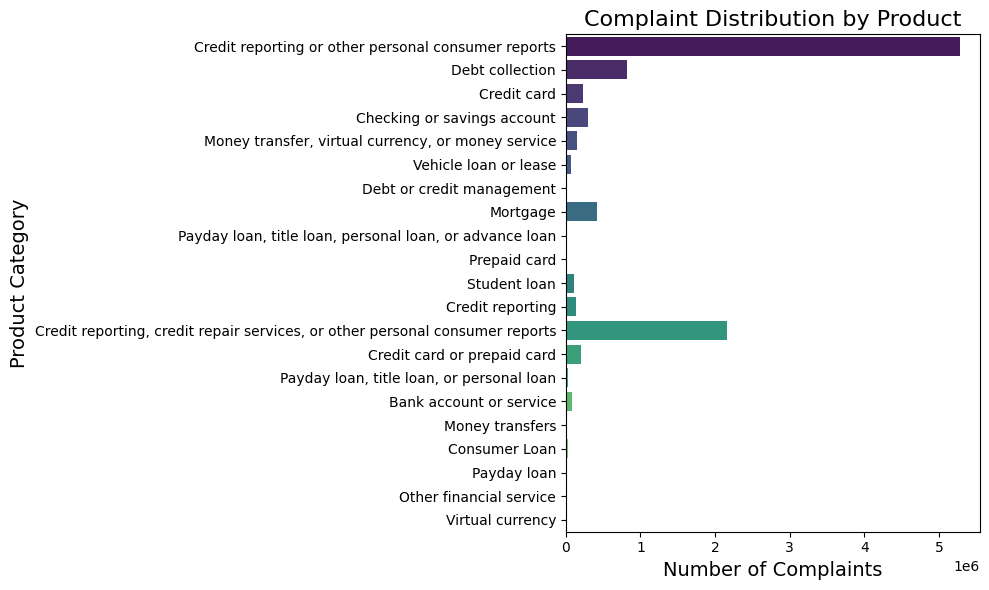

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Optional: display plots inline in Jupyter
%matplotlib inline

# Use your existing product distribution
product_distribution = results['product_distribution']

# Create horizontal bar plot
plt.figure(figsize=(10, 6))

sns.barplot(
    y=list(product_distribution.keys()),  # categories on y-axis
    x=list(product_distribution.values()),  # counts on x-axis
    orient='h',
    palette="viridis"  # optional color palette
)

plt.title("Complaint Distribution by Product", fontsize=16)
plt.xlabel("Number of Complaints", fontsize=14)
plt.ylabel("Product Category", fontsize=14)

# Tight layout to prevent clipping
plt.tight_layout()

# Optional: save the figure
figures_dir = Path("./figures")
figures_dir.mkdir(exist_ok=True)
plt.savefig(figures_dir / "product_distribution_horizontal.png", dpi=300)

plt.show()


In [14]:
# -----------------------------
# Step 7: Display individual plots (optional)
# -----------------------------
print("Displaying individual plots...")

print("Product distribution plot:")
processor.plot_product_distribution()


Displaying individual plots...
Product distribution plot:


2026-01-04 17:34:09,592 - INFO - Product distribution plot saved: C:\Users\amare\Documents\KAIM\week-7\rag-complaint-chatbot\reports\figures\product_distribution.png


In [10]:
print("Narrative availability plot:")
processor.plot_narrative_availability()

Narrative availability plot:


2026-01-04 17:32:09,187 - INFO - Narrative availability plot saved: C:\Users\amare\Documents\KAIM\week-7\rag-complaint-chatbot\reports\figures\narrative_availability.png


In [11]:
print("Narrative lengths distribution plot:")
processor.plot_raw_word_lengths()

Narrative lengths distribution plot:


2026-01-04 17:32:15,628 - INFO - Raw word length histogram saved: C:\Users\amare\Documents\KAIM\week-7\rag-complaint-chatbot\reports\figures\raw_word_lengths.png


In [12]:
print("Narrative lengths distribution plot:")
processor.plot_clean_word_lengths()

Narrative lengths distribution plot:


2026-01-04 17:32:17,007 - INFO - Clean word length histogram saved: C:\Users\amare\Documents\KAIM\week-7\rag-complaint-chatbot\reports\figures\clean_word_lengths.png
